In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
# load dataset
X, y = load_data()

In [3]:
# Viewing X
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [4]:
# Viewing y

print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  1


In [5]:
# Check dimesions of the data

print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


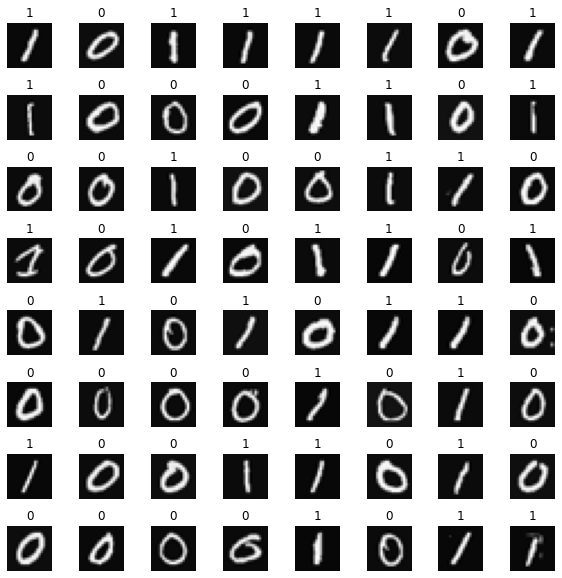

In [6]:
# Visualizing the data by randomly selecting 64 rows from X,
# mapping each row back to a 20 pixel by 20 pixel grayscale image and displaying the image together

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [7]:
# Constructing the network using Keras Sequential Model and Dense Layer

model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),    #specify input size
        ### START CODE HERE ### 
        Dense(units = 25, activation = 'sigmoid'),
        Dense(units = 15, activation = 'sigmoid'),
        Dense(units = 1, activation = 'sigmoid')
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)                            


2022-09-07 18:16:09.549653: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [9]:
# UNIT TESTS
from public_tests import * 

test_c1(model)

All tests passed!


In [10]:
# Counting the parameters in each layer

L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


In [11]:
[layer1, layer2, layer3] = model.layers

In [12]:
# Examining Weight shapes to verify that tensorflow produces the same dimensions as calculated above

W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [13]:
# Compiling the model using the BinaryCrossentropy loss since this is a binary classification problem
# and using the Adam optimizer

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

# Running gradient descent to fit the weights of the model to the training data

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 0s 920us/step - loss: 0.6928
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4871
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.3592
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2674
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2034
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1605
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1312
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1100
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0942
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0817
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0712
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0629
Epoch 13/20
32/32 [============================

In [14]:
# We use predict() in Keras to run the model on an example to make a prediction

# The input to predict is an array so the single example is reshaped to be two dimensional

prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

1/1 [==============================] - 0s 75ms/step
 predicting a zero: [[0.0116246]]
1/1 [==============================] - 0s 15ms/step
 predicting a one:  [[0.96320057]]


In [15]:
# The output of the model is interpreted as a probability
# The probability is compared to a threshold (here, 0.5) to make a final prediction

if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


1/1 [==============================] - 0s 18ms/step


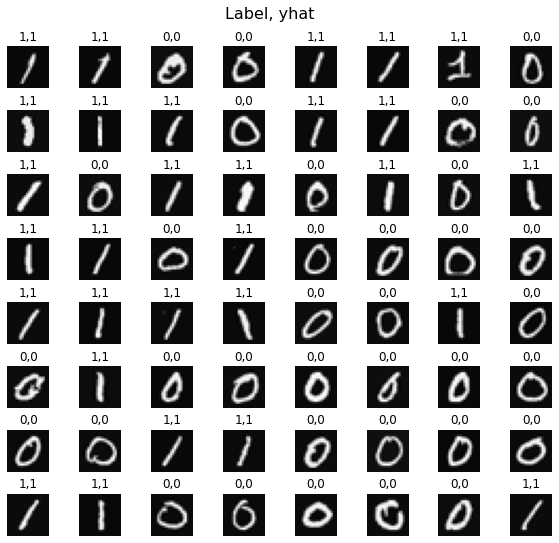

In [16]:
# Compare the predictions vs the labels for a random sample of 64 digits

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()